# 결정 트리 (Decision Tree)

- 매우 쉽고 유연하게 적용될수 있는 알고리즘. 스무고개와 상당히 유사하다.
- 데이터 스케일링, 정규화등의 전처리 영향이 매우 적다.
- 예측성능 향상을 위해 복잡한 규칙구조를 가지거나, 이로 인한 과적합이 야기되는 단점이  있다.
  - 트리깊이를 제한하거나, 리프노드의 최소클래스수를 지정해서 과적합을 어느 정도 방지할 수 있다.
  - 또한 이런 단점은 앙상블 기법(GBM, XGBoost, LightBGM등)에서 오히려 장점이 된다. 앙상블은 여러개의 약한 학습기(예측성능이 떨어지는 알고리즘)을 결합해 확률적 보완과 오류가 발생한 부분에 대한 가중치를 계속 업데이트 하면서 예측 성능을 향상시킨다. 여기에는 결정트리와 같은 약한 학습기가 필요하다.


<img src="https://d.pr/i/5dpubW+" width='500px'>


**하이퍼 파라미터**

<table>
  <thead>
    <tr>
      <th>파라미터 명</th>
      <th>설명</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><code>max_depth</code></td>
      <td>
        트리의 최대 깊이를 규정. 디폴트는 None. <br>
        None으로 설정하면 완벽하게 클래스 결정 값이 될 때까지 깊이를 계속 키우며 분할하거나 노드가 가지는 데이터 개수가 <code>min_samples_split</code>보다 작아질 때까지 계속 깊이를 증가시킴. <br>
        깊이가 길어지면 <code>min_samples_split</code> 설정대로 최대 분할하여 과적합할 수 있으므로 적절한 값으로 제어 필요.
      </td>
    </tr>
    <tr>
      <td><code>max_features</code></td>
      <td>
        최적의 분할을 위해 고려할 최대의 피처 개수. 디폴트는 None으로 데이터 세트의 모든 피처를 사용해 분할 수행.
        <ul>
          <li><code>int</code> 형으로 지정하면 대상 피처의 개수, <code>float</code> 형으로 지정하면 전체 피처 중 대상 피처의 퍼센트임</li>
          <li><code>'sqrt'</code>는 전체 피처 중 sqrt(전체 피처 개수) 즉, 전체 피처 개수만큼 선택</li>
          <li><code>'auto'</code>로 지정하면 sqrt와 동일</li>
          <li><code>'log'</code>는 전체 피처 중 log2(전체 피처 개수) 선택</li>
          <li><code>'None'</code>은 전체 피처 선택</li>
        </ul>
      </td>
    </tr>
    <tr>
      <td><code>min_samples_split</code></td>
      <td>
        노드 분할을 위한 최소 samples (<code>min_samples_split=2</code>(기본값) 부모노드의 sample수가 2이상인 경우, 분할한다. 자식노드의 sample수가 2이하 일수 있다.) <br>
        작게 설정할 수록 과적합 가능성이 증가한다.
      </td>
    </tr>
    <tr>
      <td><code>min_samples_leaf</code></td>
      <td>
        분할이후 만족시켜야할 sample 최소개수 (<code>min_samples_leaf=2</code>일때, 분할이후 자식노드의 sample수가 2개이상이 된다면 부모노드를 분할한다) <br>
        작게 설정할 수록 과적합 가능성이 증가한다.
      </td>
    </tr>
    <tr>
      <td><code>max_leaf_nodes</code></td>
      <td>분할이후 leaf_node 최대개수</td>
    </tr>
    <tr>
      <td><code>criterion</code></td>
      <td>
        분할을 위해 사용할 성능 평가 지표를 설정. <br>
        <code>gini</code> 또는 <code>entropy</code> 값을 사용할 수 있으며, <code>gini</code>는 지니 계수를, <code>entropy</code>는 정보 이득을 기반으로 분할 기준을 결정함.
      </td>
    </tr>
    <tr>
      <td><code>min_weight_fraction_leaf</code></td>
      <td>
        리프 노드가 전체 가중치에서 차지해야 하는 최소 비율. 기본값은 0이며, 이는 특정 클래스의 데이터가 지나치게 적은 경우 과적합을 방지하기 위해 사용함.
      </td>
    </tr>
  </tbody>
</table>

**정보균일도 측정방법**

<table>
  <thead>
    <tr>
      <th>측정방법</th>
      <th>설명</th>
      <th>분할 기준</th>
      <th>criterion 값</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><strong>지니 계수 (Gini)</strong></td>
      <td>- 지니 계수는 경제학에서 불평등 지수를 나타낼 때 사용하는 계수이며, 코라도 지니(Corrado Gini)의 이름에서 유래함.<br>
          - 지니 계수가 낮을수록 데이터 균일도가 높음.<br>
          - 지니 불순도 공식: <br>
          <code>$Gini = 1 - (p_0^2 + p_1^2 + \cdots + p_k^2)$</code><br>
          <strong>- 지니 계수가 낮아질 수 있도록 속성을 기준으로 분할</strong></td>
      <td>- 자식노드로 갈수록 지니 계수가 낮아지도록 분할</td>
      <td><code>gini</code></td>
    </tr>
    <tr>
      <td><strong>정보이득 (Information Gain)</strong></td>
      <td>- 정보 이득은 엔트로피 개념을 기반으로 하며, 엔트로피는 데이터 집합의 혼잡도를 의미함.<br>
          - 엔트로피 공식: <br>
          <code>$Entropy = -\sum (p_k \cdot \log_2(p_k))$</code><br>
          - 정보 이득은 $1 - \text{엔트로피 지수}$로 계산됨.<br>
          <strong>- 부모노드와 자식노드의 정보이득지수 차이가 가장 큰 속성을 기준으로 분할</strong></td>
      <td>- 정보 이득이 높은 속성을 기준으로 분할</td>
      <td><code>entropy</code></td>
    </tr>
    <tr>
      <td><strong>분산도 (Variance)</strong></td>
      <td>- 분산도는 회귀 문제에서 사용되며, 데이터의 퍼짐 정도를 나타냄.<br>
          - 분산도 공식: <br>
          <code>$Variance = \frac{\sum (x_i - \mu)^2}{N}$</code><br>
          <strong>- 분산이 낮아지도록 분할</strong></td>
      <td>- 자식노드로 갈수록 분산이 낮아지도록 분할</td>
      <td><code>mse</code> 또는 <code>variance</code></td>
    </tr>
  </tbody>
</table>


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, classification_report

In [3]:
# 와인데이터 로드
# - class 0 (레드와인), 1(화이트와인)
wine_df = pd.read_csv('../data/wine_simple.csv')
wine_df.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 데이터 준비
X=wine_df.drop('class', axis=1)
y=wine_df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape, y_train.shape)
print(X_test_scaled.shape, y_test.shape)



(5197, 3) (5197,)
(1300, 3) (1300,)


In [5]:
# 모델 학습
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train_scaled, y_train)

# 평가/예측
print("학습셋 평가:", dt_clf.score(X_train_scaled, y_train))
print("평가셋 평가:", dt_clf.score(X_test_scaled, y_test))
# 학습셋 평가: 0.9978833942659227
# 평가셋 평가: 0.8715384615384615
# -> 과적합 , 학습셋만 너무 학습됨

학습셋 평가: 0.9978833942659227
평가셋 평가: 0.8676923076923077


## Graphviz 설치
1. OS레벨 설치 (환경변수 Path에 등록)
2. python wrapper 설치 (pip install)

In [6]:
#%pip install graphviz pydotplus

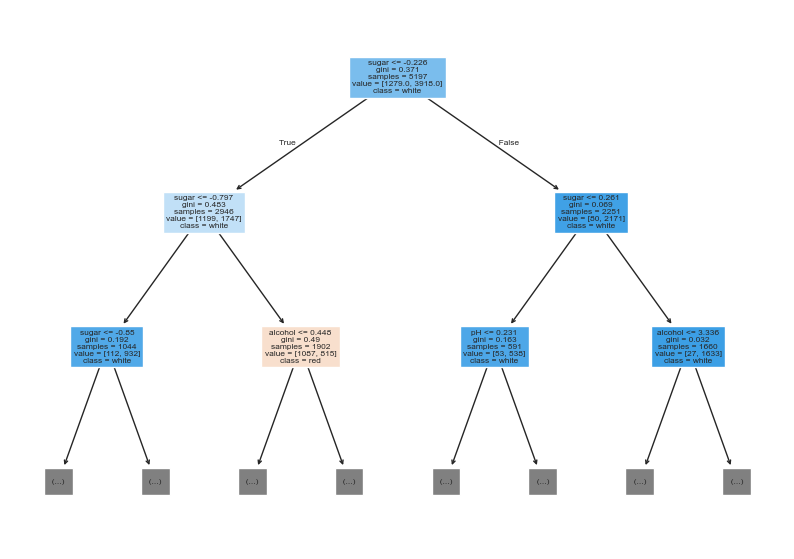

In [7]:
# 시각화
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt_clf, max_depth=2,filled=True, feature_names=wine_df.columns[:-1], class_names=['red', 'white'])
plt.savefig('dt_tree_wine.png', dpi=300, bbox_inches='tight')
plt.show()

## 정보이득 Infomation Gain | 불순도 Impurity 측정
> 결정트리는 정보이득이 클 수 있는, 불순도가 최대로 감소할 수 있는 분류기준을 찾는다.
>
> 도구로써 gini계수, entropy지수가 활용될 수 있다.


**분할 조건 선정과정**
criterion='gini' 또는 criterion='entropy'로 설정하면, 결정 트리 알고리즘이 노드를 분할할 때 **불순도(impurity)를 계산**한다.


`sugar <= -0.239`와 같은 조건은 결정 트리 알고리즘이 자동으로 선택한 기준이다.


결정 트리는 데이터를 반복적으로 분할하면서, **불순도**(impurity)를 가장 많이 줄일 수 있는 기준을 찾는다.


1. **불순도 계산**: 각 특성의 다양한 임계값에 대해 불순도 지표(Gini 또는 Entropy)를 계산한다.
2. **불순도 감소 확인**: 임계값에 따라 분할했을 때, 불순도가 얼마나 감소하는지를 측정한다.
3. **최적의 분할 조건 선택**: 불순도를 가장 많이 줄이는 임계값을 선택한다.


따라서, `sugar <= -0.239`라는 조건은 특성의 여러 임계값을 시도해보면서, sugar가 -0.239일 때 가장 크게 불순도가 감소한다고 판단한 것이다.
즉, 이 임계값이 노드를 가장 잘 나누는 기준 즉, 해당 지점에서 **불순도 감소가 최대**가 되는 임계값을 의미한다.


### 지니불순도 계산
지니 불순도(Gini Impurity)는 **데이터가 얼마나 섞여 있는지**를 측정하는 값이다.


**지니 불순도 계산 공식:**
이진분류, 다중분류 모두 동일하다.


$
\text{Gini} = 1 - (클래스1 비율^2 + 클래스2 비율^2 + ... + 클래스n 비율^2)
$


지니 불순도 값이 **0에 가까우면 한쪽 클래스만 있다는 뜻**이고, **0.5에 가까우면 두 클래스가 섞여 있다는 뜻**이다.
즉, 지니 불순도가 낮을수록 "순수한" 그룹이고, 높을수록 섞여 있는 그룹이다.


**다음과 같이 작성할 수 있다.**


$
\text{Gini} = 1 - \sum_{k=1}^K p_k^2
$


- $K$는 클래스의 개수
- $p_k$는 각 클래스의 비율
- 예를 들어, 세 개의 클래스가 있을 때, $p_1$, $p_2$, $p_3$가 각각의 클래스 비율이라면, 지니 불순도는 $1 - (p_1^2 + p_2^2 + p_3^2)$로 계산된다.
`

In [8]:
# 불순도가 클수록 많이 섞였다.
# 남자 그룹에 남자만 있고, 여자 그룹에 여자만 있으면 불순도가 낮다
"""
sugar <= -0.226
gini = 0.371
samples = 5197
value = [1279.0, 3918.0]
class = white
"""

# 1 - (클래스1비율제곱 + 클래스2비율 제곱)
1 - ((1279/5197) **2 + (3918/5197) **  2)

0.37107315616915937

### 엔트로피지수
- 정보 이득은 엔트로피 개념을 기반으로 하며, 엔트로피는 데이터 집합의 혼잡도를 의미함.
- 엔트로피 공식:
    $Entropy = -\sum (p_k \cdot \log_2(p_k))$
- 정보 이득은 $1 - \text{엔트로피 지수}$로 계산됨.
- 부모노드와 자식노드의 정보이득지수 차이가 가장 큰 속성을 기준으로 분할
- 정보 이득이 높은 속성을 기준으로 분할


In [9]:
# 엔트로피 : 쓰레기 더미
# 정보이득 : 쓰레기를 치워서 얼마나 깨끗해졌을까
# 1- 엔트로피 지수로 계산된다.

In [10]:
dt_clf = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=5)
dt_clf.fit(X_train_scaled, y_train)

print('학습셋 :', dt_clf.score(X_train_scaled, y_train))
print('평가셋 :', dt_clf.score(X_test_scaled, y_test))

학습셋 : 0.8703097941119877
평가셋 : 0.8576923076923076


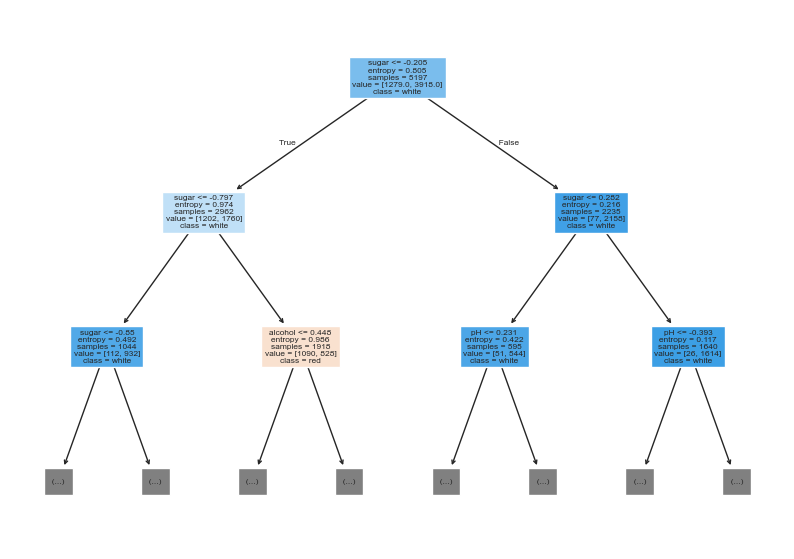

In [11]:
plt.figure(figsize=(10,7))
#plot_tree() : 결정트리 시각화 함수
plot_tree(dt_clf, max_depth=2, filled=True, feature_names=wine_df.columns[:-1], class_names=['red', 'white'])

# dpi : 선명도
# bbox_inches : 공백
plt.savefig('dt_tree_wine_by_entropy.png', dpi=300, bbox_inches='tight')
plt.show()

## 가지치기 Pruning
결정트리 과적합을 방지하는 기법


- 사전 가지치기: 하이퍼파라미터 트리분할 조정
    - max_depth, min_samples_split, min_sample_leaf
- 사후 가지치기: 트리를 우선 생성후, 불필요한 노드제거
    - ccp_alpha


In [12]:
# max_depth : 트리 최대 깊이 제한
dt_clf1 = DecisionTreeClassifier(random_state=42, criterion='entropy')
dt_clf1.fit(X_train_scaled, y_train)

print('가지치기 적용 X')
print('학습셋 :', dt_clf1.score(X_train_scaled, y_train))
print('평가셋 :', dt_clf1.score(X_test_scaled, y_test))


dt_clf2 = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=5)
dt_clf2.fit(X_train_scaled, y_train)

print('가지치기 적용 O')
print('학습셋 :', dt_clf2.score(X_train_scaled, y_train))
print('평가셋 :', dt_clf2.score(X_test_scaled, y_test))

가지치기 적용 X
학습셋 : 0.9978833942659227
평가셋 : 0.8669230769230769
가지치기 적용 O
학습셋 : 0.8703097941119877
평가셋 : 0.8576923076923076


In [13]:
# min_samples_split : 분할을 위한 최소 샘플 수
# n개 이상일 때만 분할 시도
# max_depth : 트리 최대 깊이 제한
dt_clf1 = DecisionTreeClassifier(random_state=42)
dt_clf1.fit(X_train_scaled, y_train)

print('가지치기 적용 X')
print('학습셋 :', dt_clf1.score(X_train_scaled, y_train))
print('평가셋 :', dt_clf1.score(X_test_scaled, y_test))


dt_clf2 = DecisionTreeClassifier(random_state=42, criterion='entropy', min_samples_split=170)
dt_clf2.fit(X_train_scaled, y_train)

print('가지치기 적용 O')
print('학습셋 :', dt_clf2.score(X_train_scaled, y_train))
print('평가셋 :', dt_clf2.score(X_test_scaled, y_test))

가지치기 적용 X
학습셋 : 0.9978833942659227
평가셋 : 0.8646153846153846
가지치기 적용 O
학습셋 : 0.8762747739080239
평가셋 : 0.8515384615384616


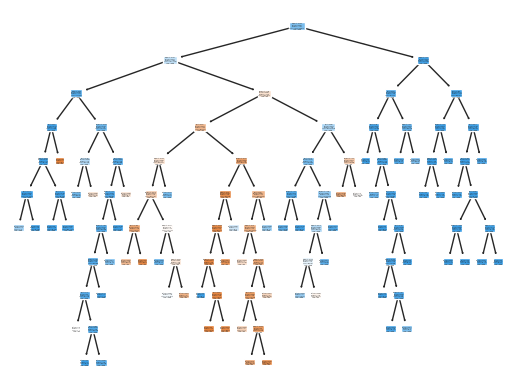

In [14]:
plot_tree(dt_clf2, filled=True, feature_names=wine_df.columns[:-1], class_names=['red', 'white'])                                                # 정답빼고
plt.show()

In [15]:
# min_samples_leaf: leaf 노드가 되기 위한 최소한의 샘플 수
# - 분할 했을 때 자식 노드가 모두 n개 이상 이어야 한다.
# - 현재 노드 10개 샘플을 가지고 있고, min_samples_leaf = 6이면 더이상 분할하지 않는다.

dt_clf1 = DecisionTreeClassifier(random_state=42)
dt_clf1.fit(X_train_scaled, y_train)

print('가지치기 적용 X')
print('학습셋 :', dt_clf1.score(X_train_scaled, y_train))
print('평가셋 :', dt_clf1.score(X_test_scaled, y_test))


dt_clf2 = DecisionTreeClassifier(random_state=42,min_samples_leaf=100)
dt_clf2.fit(X_train_scaled, y_train)

print('가지치기 적용 O')
print('학습셋 :', dt_clf2.score(X_train_scaled, y_train))
print('평가셋 :', dt_clf2.score(X_test_scaled, y_test))

가지치기 적용 X
학습셋 : 0.9978833942659227
평가셋 : 0.8646153846153846
가지치기 적용 O
학습셋 : 0.8674235135655186
평가셋 : 0.8492307692307692


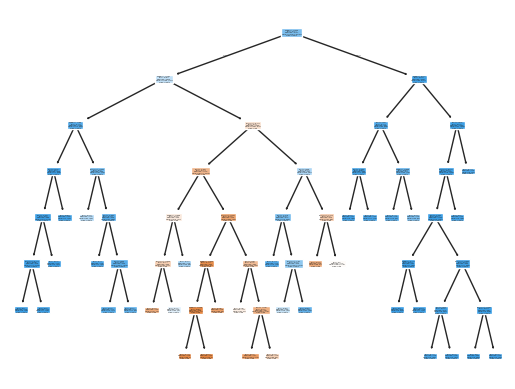

In [16]:
plot_tree(dt_clf2, filled=True, feature_names=wine_df.columns[:-1], class_names=['red', 'white'])                                                # 정답빼고
plt.show()

## 특성중요도
노드를 분할할 때 가장 많이 기여한 특성일수록 중요도가 높다.

In [17]:
print(wine_df.columns[:-1])
dt_clf.feature_importances_

Index(['alcohol', 'sugar', 'pH'], dtype='object')


array([0.12596766, 0.74060754, 0.13342481])

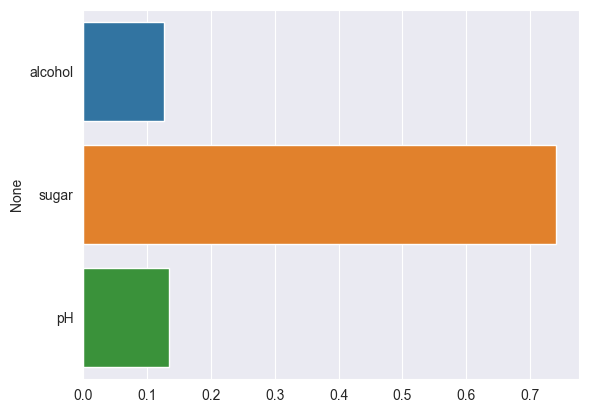

In [19]:
# 시각화
sns.barplot(
    x=dt_clf.feature_importances_,
    y=wine_df.columns[:-1],
    hue=wine_df.columns[:-1]
)

plt.show()

## 실습문제 : iris

1. 데이터로드
2. 결정트리 학습
3. 시각화(어떤 분할기준)
4. 가장 중요한 특성은 무엇일까?

In [31]:
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape, y_train.shape)
print(X_test_scaled.shape, y_test.shape)



(120, 4) (120,)
(30, 4) (30,)


In [41]:
# 모델학습 및 평가

from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=42, max_depth=3)
dt_clf.fit(X_train, y_train)

# 평가/예측
print("학습셋 평가:", dt_clf.score(X_train, y_train))
print("평가셋 평가:", dt_clf.score(X_test, y_test))


학습셋 평가: 0.9833333333333333
평가셋 평가: 0.9666666666666667


In [47]:
# 하이퍼파라미터 최적화
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3,4,5],
    'min_samples_split': [2,3],
    'min_samples_leaf': [1,2]
}

grid_search = GridSearchCV(dt_clf, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy') # 정확도를 기준으로 뭐가 젤 좋은 모델인지 평가해봐

grid_search.fit(X_train, y_train)

print('best_params:', grid_search.best_params_)
print('best_score:', grid_search.best_score_)

best_model = grid_search.best_estimator_
print('학습셋:', best_model.score(X_train, y_train))
print('평가셋:', best_model.score(X_test, y_test))

# 둘다 점수가 잘 나와야하고, 차이가 별로 안나와야한다.
# 근데 최적화 안했을때랑 점수가 똑같다. == 튜닝을 한다고 해서 무조건 성능이 오르는 게 아니다.

best_params: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
best_score: 0.9583333333333334
학습셋: 0.9833333333333333
평가셋: 0.9666666666666667


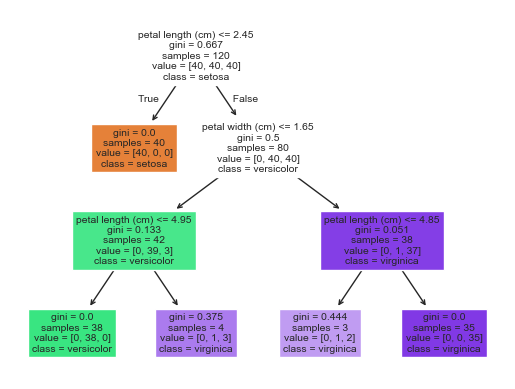

In [48]:
# 시각화
plot_tree(dt_clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.savefig('dt_tree_iris.png', dpi=300, bbox_inches='tight')
plt.show()

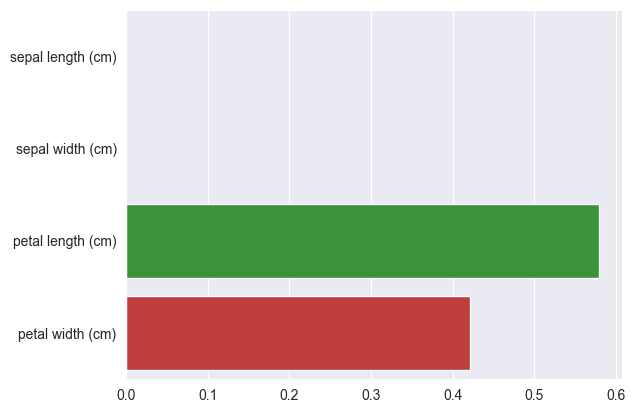

In [49]:
# 특성 중요도
sns.barplot(
    x=dt_clf.feature_importances_,
    y=iris.feature_names,
    hue=iris.feature_names
)
plt.show()